# 3. Полиномы и присоединённые функции Лежандра

Автор: [Илья Ощепков](https://thegeodesy.com/)

В этой части мы активно будем пользоваться средствами языка Python, поэтому сразу делаем необходимые импорты.

In [1]:
import copy
import numpy as np
from scipy import special
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['text.usetex']=True
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)

from sympy import *
init_printing()

## Присоединённое уравнение Лежандра

Мы будем рассматривать присоединённое уравнение Лежандра

\begin{equation}
\label{eq:assoc-legendre}\tag{1}
\left( 1 - t^2 \right) \dfrac{d^2 P_n^m (t)}{dt^2} - 2 t \dfrac{d P_n^m (t)}{dt} + 
\left[ n (n + 1) - \dfrac{m^2}{1 - t^2} \right] P_n^m (t) = 0, \quad -1 \leq t \leq 1,
\end{equation}

решением которого служат присоединённые функции Лежандра $P_n^m (t)$. 

Напоминаю, что $n$ здесь обозначает степень, а $m$ — порядок, причём $0 \leq m \leq n$.

## Полиномы Лежандра

При $m = 0$ присоединённое уравнение Лежандра принимает вид
$$
\left( 1 - t^2 \right) \dfrac{d^2 P_n (t)}{dt^2} - 
2 t \dfrac{d P_n (t)}{dt} + 
n (n + 1)  P_n (t) = 0
$$
и называется дифференциальным **уравнением Лежандра** (уже не присоединённым). 

Полиномы
$$
\begin{equation}
\label{eq:rodrigues}\tag{2}
P_n (t) = \dfrac{1}{2^n n!}\dfrac{d^n}{d t^n} (t^2 - 1)^n,\quad n = 0,1...,
\end{equation}
$$
называемые **полиномами (или многочленами) Лежандра**, удовлетворяют этому уравнению, то есть являются его решением.

Равенство \eqref{eq:rodrigues} называется **формулой Родрига**.

Действительно, рассмотрим функцию вида

$$
f_n (t) = (t^2 - 1)^n,
$$

продифференцировав которую, получим выражение

$$
\begin{equation}
\label{eq:t21diff}\tag{3}
\left(t^2 - 1\right) f^{(1)}_n (t) -  2 n t f_n = 0,
\end{equation}
$$

где верхний индекс в скобках $f^{(1)}$ означает порядок производной. Нам требуется продифференцировать это выражение $n + 1$ раз. Сначала получим несколько полезных соотношений. Для любой функции $f\left( t \right)$ справедливо 

$$
\left( t \cdot f\right)^{(n)} = tf^{(n)} + nf^{(n-1)}.
$$

Это равенство можно доказать индуктивно. Очевидно, что оно выполняется для $n=0$, что приводит нас к $tf = tf$, а также для $n=1$ по правилу произведения. Продолжая таким же образом, можно получить
\begin{align*}
\left(t f\right)^{(0)} &= tf,\\
\left(t f\right)^{(1)} &= tf^{(1)} + f^{(0)} = tf^{(1)} + f,\\
\left(t f\right)^{(2)} &= \left(tf^{(1)} + f\right)^{(1)} = tf^{(2)} + 2f^{(1)},\\
\left(t f\right)^{(3)} &= \left(tf^{(2)} + 2f^{(1)}\right)^{(1)} = tf^{(3)} + 3f^{(2)},\\
 & \vdots \\
\left(t f\right)^{(n)} &= \left(tf^{(n-1)} + (n-1)f^{(n-2)}\right)^{(1)} = tf^{(n)} + nf^{(n-1)}.
\end{align*}

Применим полученное соотношение к $t^2 f$:

$$
\begin{align*}
\left(t^2 f\right)^{(n)} &= \left(t \cdot tf\right)^{(n)} = 
t\left(tf\right)^{(n)}  + n \left(tf\right)^{(n-1)} \\
&= t \left( tf^{(n)} + nf^{(n-1)} \right) +
n \left( tf^{(n-2)} + (n-1)f^{(n-2)} \right)\\
&= t^2 f^{(n)} + 2nt f^{n-1} + n (n - 1) f^{n-2}.
\end{align*}
$$

Продолжая также и дальше, получим хорошо известную [формулу Лейбница](https://ru.wikipedia.org/wiki/%D0%A4%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D0%B0_%D0%9B%D0%B5%D0%B9%D0%B1%D0%BD%D0%B8%D1%86%D0%B0_(%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%BE%D0%B9_%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F)) для вычисления $n$-й производной произведения двух функций $f(t)$ и $g(t)$

\begin{equation}
\label{eq:leibniz}\tag{4}
\left(f\cdot g\right)^{(n)} = 
\sum_{k=0}^{n} \dfrac{n!}{k! (n - k)!} f^{(k)} g^{(n-k)}.
\end{equation}

В частности,

$$
\left[ \left( t^2 - 1 \right) f \right]^{(n)} = 
\left( t^2 - 1 \right) f^{(n)} + 2nt f^{n-1} + n\left( n - 1 \right) f^{(n-2)}.
$$

Теперь, с помощью полученных соотношений, можем дифференцировать выражение \eqref{eq:t21diff} $n + 1$ раз:

$$
\begin{align*}
\left[(t^2 - 1) f^{(1)}_n - 2nt f\right]^{(n + 1)} &= \\
&=\left( t^2 - 1 \right) f^{(n+2)} + 2\left( n + 1 \right) t f^{n+1} + 
n\left( n + 1 \right) f^{(n-2)} \\
&- 2nt f^{(n + 1)} - 2n \left( n + 1 \right) f^{(n)}\\
&= \left( t^2 - 1 \right) f^{(n+2)} + 2t f^{(n + 1)} - 
n \left( n + 1 \right) f^{(n)},
\end{align*}
$$

откуда

$$
\left( 1 - t^2 \right) f^{(n + 2)} - 2tf^{(n+1)} + n\left( n + 1 \right) f^{(n)} = 0,
$$

что в точности совпадает с уравнением Лежандра, а значит функция 

$$
f_n^{(n)} = \dfrac{d^n}{dt^n} \left(t^2 - 1\right)^{n} 
$$

является его решением, а стало быть, и полиномы Лежандра, выражаемые формулой Родрига. Осталось установить, откуда в последней берётся множитель $\frac{1}{2^n \cdot n!}$. Дело в том, что полиномы Лежандра стандартизируются под условием

$$
P_n\left( 1 \right) = 1.
$$

Мы могли бы сказать нормируются, вместо стандартизируются, однако под нормой мы будем понимать нечто иное, о чём будет сказано далее, а потому хотим избежать путаницы. Таким образом, нам нужно, чтобы все полиномы Лежандра от 1 были равны 1. Применим формулу Лейбница \eqref{eq:leibniz} для полученного нами решения

$$
\begin{align*}
f^{(n)} &= \left[ \left(t^2 - 1\right)^n \right]^{(n)} = 
\left[ \left(t - 1\right)^n \left(t + 1\right)^n \right]^{(n)}\\
&= \sum_{k=0}^{n} \dfrac{n!}{k! (n - k)!}
\left[ \left(t + 1\right)^n \right]^{(k)}
\left[ \left(t - 1\right)^n \right]^{(n-k)}  \\
& = \sum_{k=0}^{n} \dfrac{n!}{k! (n - k)!}
\dfrac{n!}{(n - k)!} \left(t + 1\right)^{n-k} \cdot
\dfrac{n!}{k!}\left(t - 1\right)^{k} \\
& = n! \sum_{k=0}^{n} \left( \dfrac{n!}{k! (n - k)!} \right)^2 
\left(t + 1\right)^{n-k}\left(t - 1\right)^{k},\\
& = n! \sum_{k=0}^{n} \binom{n}{k}^2 
\left(t + 1\right)^{n-k}\left(t - 1\right)^{k}
\end{align*}
$$

где использовано ещё одно следствие формулы Лейбница 
$\dfrac{d^k}{d t^k} x^n = \dfrac{n!}{\left(n - k\right)!} x^{(n-k)}$ и запись бинома Ньютона. 

При $t = 1$ все члены последовательности со смешанными произведениями при $k>0$ обратятся в нуль, то есть останётся только первый член, поэтому

$$
f^{(n)} \left( 1 \right) = n! \binom{n}{0}^2 2^{n} = n! \cdot 2^{n}.
$$

Таким образом, для того, чтобы $P_n \left( 1 \right) = 1$, нужно функцию $f^{(n)}$ поделить на $2^{n}\cdot n!$, что и приводит нас к формуле Родрига.

### Полиномы Лежандра первых степеней

Воспользовавшись формулой Родрига, получим явный вид полиномов Лежандра первых четырёх степеней (проверьте сами!):

\begin{align}
P_0 \left(t\right) &= 1, \\
P_1 \left(t\right) &= \dfrac{1}{2^1\cdot 1!}\dfrac{d}{d t} (t^2 - 1) = t, \\
P_2 \left(t\right) &= \dfrac{1}{2^2\cdot 2!}\dfrac{d^2}{d t^2} (t^2 - 1)^2 = 
\dfrac{1}{2}\left(3 t^2 - 1 \right),\\
P_3 \left(t\right) &= \dfrac{1}{2^3\cdot 3!}\dfrac{d^3}{d t^3} (t^2 - 1)^3 = 
\dfrac{1}{2}\left(5 t^3 - 3 t\right).\\
P_4 \left(t\right) &= \dfrac{1}{2^4\cdot 4!}\dfrac{d^4}{d t^4} (t^2 - 1)^4 = 
\dfrac{1}{8}\left(35 t^4 - 30 t^2 + 3\right).\\
\end{align}

Замечаем полезное свойство: сумма коэффициентов многчленов равна 1. Так можно контролировать свои вычисления.

### Рекуррентные соотношения

Обычно для вычисления полиномов Лежандра используют так называемые рекуррентные соотношения.

Действительно, пользоваться формулой Родрига в практических приложения неудобно, поскольку нужно вычислять производные высоких порядков, что является трудоёмкой процедурой.

Рекуррентная формула означает, что каждый член последовательности может быть вычислен на основе предыдущих значений этой последовательности. 

Можно показать, что полиномы Лежандра удовлетворяют следующему рекуррентному соотношению
$$
\begin{equation}
P_{n+1} \left(t\right) = \dfrac{2n + 1}{n + 1} t P_{n} \left(t\right) - 
\dfrac{n}{n + 1} P_{n-1} \left(t\right).
\end{equation}
$$
Принимая за начальные условия полученные нами ранее значения 
$$
P_{0} \left(t\right) = 1,\ \qquad P_{1} \left(t\right) = t
$$
можно последовательно получить все полиномы Лежандра до степени $n + 1$.

Переставляя индексы, рекуррентное соотношение можно привести к удобному для вычислений виду
$$
\begin{equation}
P_{n} \left(t\right) = \dfrac{2n - 1}{n} t P_{n-1} \left(t\right) - 
\dfrac{n - 1}{n} P_{n-2} \left(t\right).
\end{equation}
$$

Для производных полиномов Лежандра также можно записать рекуррентное соотношение:

$$
P'_{n}\left(t\right)=\frac{n}{1-t^2} 
\left[P_{n-1}\left(t\right)-t P_n\left(t\right)\right].
$$

Оно не является единственно возможным, но примечательно тем, что производные вычисляются на основе самих полиномов, а не производных предыдущих членов последовательности. Запишем ещё одно, которое нам пригодится далее:

$$
P'_{n + 1} \left(t\right) - P'_{n - 1} \left(t\right) = 
\left( 2n + 1\right) P_n \left(t\right).
$$

Здесь стоит сделать важное замечание. В геодезических приложениях могут использоваться полиномы Лежандра очень высоких степеней ($n >> 100$). И для этих случаев приведённые рекуррентные соотношения работать не будут ввиду ограничений в точности представления чисел с плавающей точкой в современных компьютерах. Применяются совершенно иные высокопроизводительные алгоритмы и разработанные на основе них библиотеки (например, [SHTOOLS](https://shtools.oca.eu)).

Давайте хотя бы сравним производительность собственной простейшей реализации на чистом Python со встроенной в SciPy функции `scipy.special.lpn`, которая, как ни странно, сама тоже не подходит для приложений с высокими степенями.

Итак, наша реализация на чистом Python:

In [2]:
def lpn(n, t):
    if not -1 <= t <= 1:
        return ValueError('t is not -1 <= t <= 1')
    if(n == 0): 
        return 1
    elif(n == 1): 
        return t
    else: 
        return ((2*n - 1) * t * lpn(n - 1, t) - (n - 1) * lpn(n - 2, t)) / n 

In [3]:
%time lpn(20, 0.5)

CPU times: user 4.77 ms, sys: 115 µs, total: 4.89 ms
Wall time: 4.89 ms


In [4]:
%time special.lpn(20, 0.5)[0][-1]

CPU times: user 50 µs, sys: 5 µs, total: 55 µs
Wall time: 56.5 µs


При одинаковом результате, мы получили, что функция `scipy.special.lpn` производительнее на три порядка, это ещё и при том, что она возвращает не только сами полиномы Лежандра, но и их производные. Отсюда стоит сделать простой вывод, что в подавляющем большинстве случаев собственные реализации алгоритмов работают не быстрее или не стабильнее уже имеющихся в популярных библиотеках. Однако в образовательных целях собственные реализации полезны.

### График и свойства полиномов Лежандра

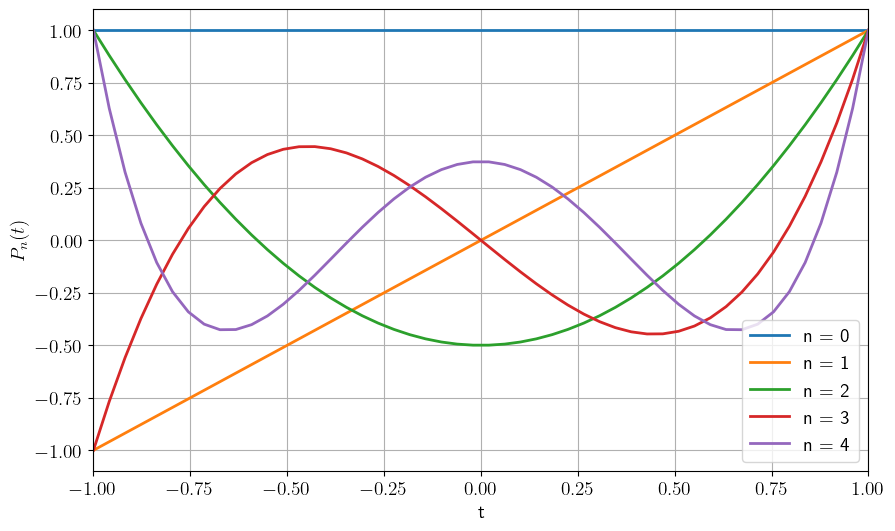

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

n_max = 4
x = np.linspace(-1, 1)
y = np.array([special.lpn(n_max, xi)[0]  for xi in x]).T

for n, yn in enumerate(y):
    ax.plot(x, yn, label = 'n = ' + str(n), linewidth=2)

ax.legend(fontsize=14, loc=4)
ax.set_xlabel('t', fontsize=14)
ax.set_ylabel('$P_n (t)$', fontsize=14)
ax.set_xlim(-1, 1)
ax.grid()

Из графиков мы замечаем важное свойство, что полиномы могут быть как чётной, так и нечётной функцией

$$
P_n \left( -t \right) = \left( -1 \right)^n P_n \left( t \right),
$$

причём, если степень $n$ чётная, то и полиномы $P_n \left( t \right)$  будут чётными, если степень $n$ нечётная, то и полиномы $P_n \left( t \right)$ будут нечётными.

В частности, условие стандартизации запишется так

$$
P_n \left( 1 \right) = 1,\quad P_n \left( -1 \right) = \left( -1 \right)^n.
$$

Ещё одно довольно очевидное свойство заключается в том, что уравнение вида $P_n \left(t\right) = 0$ имеет $n$ корней, а значит и полином степени $n$ имеет $n$ корней, то есть график функции $P_n$ пересекает ось абсцисс $n$ раз.

### Свойство ортогональности и норма полиномов Лежандра

#### Скалярное произведение функций и ортогональность

**Скалярное произведение** двух функций $f$ и $g$ в области $\Omega$ определяется формулой
$$
\left( f, g\right) = \int_{\Omega} f \cdot g d\Omega.
$$
Здесь очень хорошо работает аналогия с векторами.

В частности, две функции $f$ и $g$ называются ортогональными в области $\Omega$, 
если их скалярное произведение равно нулю, то есть
$$
\left( f, g\right) = \int_{\Omega} f \cdot g d\Omega = 0.
$$

#### Норма функции

Число $\sqrt{\left( f, f\right)}$ называтся **нормой** функции $f$ и обозначается $\| f\|$. 

Если $\| \overline{f}\| = 1$, то функцию $\overline{f}$ называют **нормированной** в области $\Omega$. 

Обратите внимание на черту сверху $\overline{f}$, мы и дальше так будем обозначать нормированные функции.

Таким образом, норма функции является аналогом длины вектора, а нормированная функция - аналог орта. Для нормированных функций

$$
\| \overline{f}\|^2 = \int_{\Omega} \left| \overline{f}\right|^2 d\Omega = 1.
$$

#### Системы функций

Система функци $f_n$ называется ортогональной в области $\Omega$, если функции этой системы попарно ортогональны.

Если для всех $n$ функции $\overline{f}_n$ нормированы, то и система называется нормированной. 

Одновременно ортогональные и нормированные системы функций называют **ортонормированными**.

Итак, система ортонормирована, если для любых $n$ и $k$, где $n \neq k$, имеем $\left( \overline{f}_n, \overline{f}_k\right) = 0$ и для любого $n$ имеем $\left( \overline{f}_n, \overline{f}_n\right) = 1$.

Эти условия можно записать так:
$$
\int_{\Omega} \overline{f}_n \cdot \overline{f}_k d\Omega = 
\begin{cases} 
0, &\mbox{если } n \neq k, \\
1, & \mbox{если } n = k.
\end{cases}
$$

Наконец, если система функций $f_n$ не является нормированной, то её можно **нормировать**, заменив каждую функцию $f_n$ функцией

$$
\overline{f}_n = \dfrac{f_n}{\| f_n\|},
$$

то есть поделив исходную функцию $f_n$ на её норму $\| f_n\|$.

#### Ортогональность полиномов Лежандра

Полиномы Лежандра являются ортогональными на отрезке $\left[-1, +1\right]$, что записывается так

$$
\int\limits_{-1}^{+1}P_n \left( t\right) P_k \left( t\right) dt = 0,\quad n\neq k.
$$

Проверим это с помощью SymPy для полиномов степени $n = 3$ и $k = 2$. Проинтегрируем их произведение от $-1$ до $+1$:

In [6]:
t = symbols('t')
n, k = 3, 2
integrate((legendre_poly(n, t) * legendre_poly(k, t)), (t, -1, 1))

#### Норма полиномов Лежандра

При $n = k$ для вычисления 

$$
\int\limits_{-1}^{+1} P_n \left( t\right) P_n \left( t\right) dt
$$

воспользуемся интегрированием по частям $\int udv = uv - \int vdu$, где

$$
\begin{align*}
u &= P^2_n \left( t \right), &  du &= 2 P'_n \left( t \right) P_n \left( t \right), \\
dv &= dt, & v &= t,
\end{align*}
$$

и получим

$$
\begin{align*}
\int\limits_{-1}^{+1} P_n \left( t\right) P_n \left( t\right) dt &=
t P^2_n \left( t\right)\ \Bigr|_{-1}^{1} - 
2\int\limits_{-1}^{+1} t P_n \left( t\right) P'_n \left( t\right) dt \\
&= P^2_n \left( 1\right) + P^2_n \left( -1 \right) - 
2 \int\limits_{-1}^{+1} t P_n \left( t\right) P'_{n-1} \left( t\right) dt -
2n \int\limits_{-1}^{+1} P^2_n \left( t\right) dt \\
& = \dfrac{1 + 1 - 0}{2n + 1} = \dfrac{2}{2n + 1},
\end{align*}
$$

где использованы свойство ортогональности, свойства $P_n \left( 1 \right) = 1$ и $P_n \left( -1 \right) = \left( -1 \right)^n$, а также рекуррентная формула для производной полиномов Лежандра.

Норма полиномов Лежандра равна:

$$
\| P_n \| = \sqrt{\int\limits_{-1}^{+1} P^2_n dt} = \sqrt{\dfrac{2}{2n + 1}}.
$$

Например, норма полинома степени $n = 3$ равна $\sqrt{\dfrac{2}{7}} = \dfrac{\sqrt{14}}{7}$. 

Проверяем прямым интегрированием:

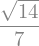

In [7]:
norm = sqrt(integrate((legendre_poly(3, t) * legendre_poly(3, t)), (t, -1, 1)))
norm

Для того, чтобы получить нормированный полином Лежандра $\overline{P_n}$ степени $n$, необходимо ненормированный полином $P_n$ поделить на норму

$$
\overline{P_n} = \dfrac{P_n }{\| P_n \|} = \sqrt{\dfrac{2n+1}{2}} P_n.
$$

Для $n = 3$ нормированный полином Лежандра получается таким

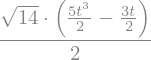

In [8]:
legendre_normed = legendre_poly(n, t) / norm
legendre_normed

Проверить нормированность, следовательно, можно из выражения
$$
\| \overline{P_n} \|^2 =  
\int\limits_{-1}^{+1} \left[\overline{P_n} \right]^2 dt = 1.
$$

In [9]:
(integrate(legendre_normed**2, (t, -1, 1)))

### Норма и ортогональность на сфере

Пользуясь выражением для квадрата нормы
$
\int\limits_{-1}^{+1} \left[P_n \right]^2 dt = \dfrac{2}{2n + 1},
$
докажем соотношение

$$
\iint_\sigma \left[P_n \left(\cos{\vartheta}\right) \right]^2 d\sigma = \dfrac{4\pi R^2}{2n + 1},
$$

где $R$ - радиус произвольной сферы.

Действительно, возвращаясь к подстановке $t = \cos{\vartheta}$ и переходя к интегрированию по сфере произвольного радиуса $R$, то есть заменяя $d\sigma$ на элемент поверхности сферы в сферических координатах $R^2 \sin{\vartheta} d\vartheta d\lambda$, получаем

$$
\begin{align*}
\iint_\sigma P_n \left(\cos{\vartheta}\right) P_k \left(\cos{\vartheta}\right) d\sigma &= 
R^2 \int\limits_{0}^{\pi} \int\limits_{0}^{2\pi}
P_n \left(\cos{\vartheta}\right) P_k \left(\cos{\vartheta}\right)\sin{\vartheta}d\vartheta d\lambda \\ &= 
2\pi R^2 \int\limits_{0}^{2\pi}
P_n \left(\cos{\vartheta}\right) P_k \left(\cos{\vartheta}\right)\sin{\vartheta}d\vartheta \\ &=
2\pi R^2 \int\limits_{-1}^{+1} 
P_n \left(t\right) P_k \left(t\right)  dt = 
\begin{cases} 
\dfrac{4\pi R^2}{2n + 1}, &\mbox{если } n = k, \\
0, & \mbox{если } n \neq k.
\end{cases}
\end{align*}
$$

Таким образом, полиномы Лежандра $P_n \left( t \right)$ ортогональны не только на отрезке $\left[-1,1\right]$, но и на сфере произвольного радиуса $R$ при $t = \cos{\vartheta}$. 

Выражение $\dfrac{4\pi R^2}{2n + 1}$ является квадратом их нормы. 

Вообще говоря, интеграл
$
\dfrac{1}{4\pi R^2} \iint_\sigma \left[ P_n \left(\cos{\vartheta}\right) \right]^2 d\sigma
$
выражает среднее интегральное значение полинома Лежандра на сфере. 

Если выбрать систему полиномов Лежандра $\overline{P_n}$ нормированных под условием равенства единице их среднего интегрального значения на сфере (делим на площадь сферы $4\pi R^2$), то есть 
$$
\dfrac{1}{4\pi R^2} \iint_\sigma \left[ 
\overline{P_n} \left(\cos{\vartheta}\right) \right]^2 d\sigma = 1,
$$
то получим так называемые **полностью нормированные полиномы Лежандра** $\overline{P_n} \left(\cos{\vartheta}\right)$. 

Они, следовательно, связаны с ненормированными полиномами Лежандра так
$$
\overline{P_n} \left(\cos{\vartheta}\right) = 
\sqrt{{2n + 1}} P_n \left(\cos{\vartheta}\right).
$$

Такой способ нормирования является наиболее распространённым в геодезических приложениях. 

Более того, в английском языке иногда употребляется "geodesy normalized", что чётко обозначает область использования. 

Таким образом, если перед словом "нормированный" и его производными стоит термин "полностью", то мы имеем ввиду нормирование в том смысле, в каком это получено в этом разделе.

### Разложение произвольной функции в ряд Лежандра

Также, как произвольный вектор может быть разложен по ортам, то есть по ортонормированным единичным векторам, так и функция может быть разложена по системе ортонормированных функций.

В частности, любая кусочно-гладкая функция может быть разложена в ряд Лежандра

$$
f \left( t \right) = \sum_{n = 0}^{\infty} a_n P_n \left( t \right)
$$

на отрезке $\left[-1, +1\right]$, где коэффициенты $a_n$ легко найти из свойства ортогональности

$$
a_n = \dfrac{\left( f, P_n \right)}{\|P_n\|^2} = 
\dfrac{2n + 1}{2} \int\limits_{-1}^{+1} f \left( t \right) P_n \left( t \right) dt.
$$

Это частный случай решения задачи аппроксимации одной функции другой функцией, как правило более простого вида. Это наиболее важное приложение специальных функций в применении их к реальным данным, когда сложные явления, описываемые функцией достаточно сложного или даже неизвестного вида, описываются более простыми и хорошо изученными функциями или их рядами.

Принимая во внимание предыдущий раздел, где было показано, что полиномы Лежандра ортогональны на сфере, то нетрудно сделать вывод, что и функцию, зависимую только от $\vartheta$ (или $\varphi$) можно разложить в ряд полиномов Лежандра в интервале $\left[0, \pi \right]$.

#### Пример: функция sgn

Достаточно простые и гладкие функции, типа экспоненты $e^x$ или тригонометрических функций, вполне хорошо и естественным образом раскладываются в ряд Лежандра, который в этом случае очень быстро сходится к исходной функции. Давайте разберём часто рассматриваемый, но чуть более сложный пример.

Разложим функцию [sgn](https://ru.wikipedia.org/wiki/Sgn) в ряд полиномов Лежандра на интервале $\left[-1, 1\right]$. 

Функция возвращает $-1$, если её аргумент отрицательный, $+1$, если её аргумент положительный, и $0$, если её аргумент равен нулю, то есть
$$
\text{sgn} (t) =
\begin{cases} 
-1, &\mbox{если } t < 0, \\
0, &\mbox{если } t = 0, \\
1, & \mbox{если } t > 0.
\end{cases}
$$

Это нечётная функция, следовательно, коэффициенты при чётных членах ряда Лежандра обратятся в нуль. 

Пользуясь этим свойством, мы можем сократить вычисления в два раза! Произведение двух нечётных функций даёт чётную функцию, по правилу интегрирования которой можно записать теперь выражение для коэффициентов так
$$
a_n = \left( 2n + 1 \right) \int_0^{1} P_n \left( t \right) dt.
$$

In [10]:
def sgn2legendre(n):
    an = np.zeros(n + 1)
    for n in np.arange(1, n+1, 2):
        an[n] = (2*n + 1) * integrate(legendre_poly(n, t), (t, 0, 1))
    return np.polynomial.Legendre(an)

Например, члены ряда Лежандра до степени $n = 5$ имеет следующие коэффициенты:

In [11]:
sgn2legendre(5)

Legendre([ 0.    ,  1.5   ,  0.    , -0.875 ,  0.    ,  0.6875], domain=[-1,  1], window=[-1,  1], symbol='x')

Посмотрим, что происходит, когда степень увеличивается. Построим графики для $n = 1, 5, 9, 21, 51, 151$.

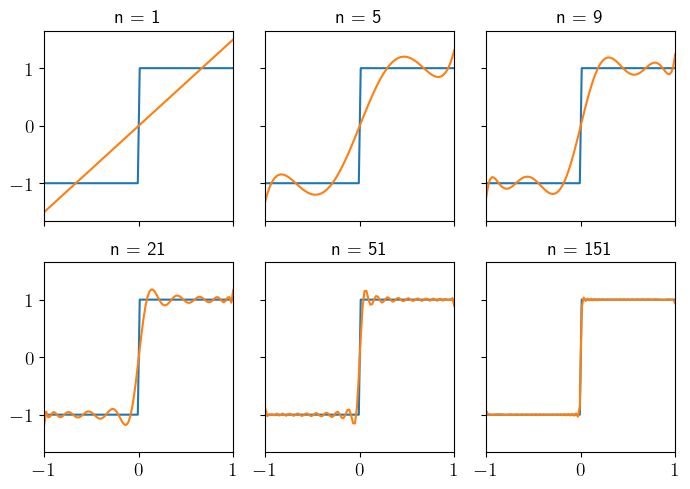

In [12]:
x = np.linspace(-1, 1, 100)
y = np.sign(x)

fig, axes = plt.subplots(2, 3, figsize=(7, 5),
                         sharey=True, sharex=True)
axes = axes.flatten()

degrees = [1, 5, 9, 21, 51, 151]
for i, n in enumerate(degrees):
    sgn_poly = sgn2legendre(n)
    axes[i].plot(x, y)
    axes[i].plot(x, sgn_poly(x))
    axes[i].set_title('n = {}'.format(n), fontsize=14)
    axes[i].set_xlim(-1, 1)
plt.tight_layout()

Итак, мы пришли к следующим результатам.

1. Из функции, которая имеет разрыв (первого рода) в нуле, получена непрерывная функция.
1. Чем больше степень, тем лучше ряд Лежандра описывает исходную фукцию $\text{sgn} (t)$.
1. Но не идеально, потому что аппроксимация это всегда приближение.
1. Главные особенности исходной функции проявились уже в первых двух десятках степеней $n$ ряда, однако для более точной аппроксимации нам понадобилось очень большое число членов ряда.
1. Несмотря на это, ещё большее увеличение числа членов ряда не приводит к абсолютно точному результату.

Эти выводы будут нам полезны и для рядов по сферическим и шаровым функциям, которыми мы займёмся в дальнейшем. Там выводы будут совершенно аналогичными.

## Присоединённые функции Лежандра

При $m\neq 0$ решением присоединённого уравнения Лежандра 

\begin{equation*}
\left( 1 - t^2 \right) \dfrac{d^2 P_n^m (t)}{dt^2} - 2 t \dfrac{d P_n^m (t)}{dt} + 
\left[ n (n + 1) - \dfrac{m^2}{1 - t^2} \right] P_n^m (t) = 0, 
\quad 0\leq m \leq n, \quad -1 \leq t \leq 1
\end{equation*}

будут присоединённые функции Лежандра $P_n^m \left( t \right)$, которые задаются выражением

$$
\begin{equation}
\label{eq:assoclegendre} \tag{5}
P_n^m \left( t \right) = \left( 1 - t^2 \right)^{\frac{m}{2}} \dfrac{d^m}{dt^m} P_n \left( t \right).
\end{equation}
$$

Действительно, производя в присоединённом уравненнии Лежандра замену

$$
P_n^m \left( t \right) = \left( 1 - t^2 \right)^{\frac{m}{2}} z \left( t \right),
$$

для функции $z$ получим уравнение

$$
\begin{equation}
\label{eq:legsolution} \tag{6}
\left( 1 - t^2\right) z'' - 2t \left( m + 1\right) t z' + 
\left[ n\left( n + 1 \right) - m \left( m + 1 \right) \right] = 0.
\end{equation}
$$

Теперь дифференцируя обыкновенное уравнение Лежандра $m$ раз также, как мы делали это при доказательстве формулы Родрига, убеждаемся, что производная $P^{(m)}_n$ удовлетворяет \eqref{eq:legsolution}. Следовательно, и присоединённые функции Лежандра $P_n^m$, задаваемые выражением \eqref{eq:assoclegendre}, являются решением присоединённого уравнения Лежандра.

### Присоединённые функции Лежандра первых степеней

Получим явный вид присоединённых функций Лежандра первых трёх степеней (проверьте самостоятельно!):

$$
\begin{align*}
P_0^0 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{0}{2}} \dfrac{d^0}{dt^0} P_0 \left( t \right) = P_0 \left( t \right) = 1, \\
P_1^0 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{0}{2}} \dfrac{d^0}{dt^0} P_1 \left( t \right) = P_1 \left( t \right) = t, \\
P_1^1 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{1}{2}} \dfrac{d}{dt} P_1 \left( t \right) = \left(1- t^2\right)^{1/2}, \\
P_2^0 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{0}{2}} \dfrac{d^0}{dt^0} P_2 \left( t \right) = P_2 \left( t \right) = \dfrac{1}{2}\left(3 t^2 - 1 \right),\\
P_2^1 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{1}{2}} \dfrac{d}{dt} P_2 \left( t \right) = 3t\left(1- t^2\right)^{1/2}, \\
P_2^2 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{2}{2}} \dfrac{d^2}{dt^2} P_n \left( t \right) = 3\left(1- t^2\right), \\
P_3^0 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{0}{2}} \dfrac{d^0}{dt^0} P_3 \left( t \right) = P_3 \left( t \right) = \dfrac{1}{2}\left(5 t^3 - 3 t\right), \\
P_3^1 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{1}{2}} \dfrac{d}{dt} P_3 \left( t \right) = \left(1- t^2\right)^{1/2} \left(\dfrac{15}{2}t^2 - \dfrac{3}{2}\right),\\
P_3^2 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{2}{2}} \dfrac{d^2}{dt^2} P_3 \left( t \right) = 15t\left(1- t^2\right), \\
P_3^3 \left( t \right) &= \left( 1 - t^2 \right)^{\frac{3}{2}} \dfrac{d^3}{dt^3} P_3 \left( t \right) = 15\left(1- t^2\right)^{3/2}. \\
\end{align*}
$$

Из этих выражений замечаем, что $P_n^0 \left( t \right) = P_n \left( t \right)$, то есть при нулевом порядке $m=0$, присоединённые функции Лежандра совпадают с полиномами Лежандра.

### Рекуррентные соотношения

Присоединённые функции Лежандра также удобно получить с помощью рекуррентных соотношений:

$$
\begin{align*}
P_{n}^n  \left( t \right) &= 
\left(2n - 1\right) \left( 1 - t^2 \right)^{\frac{1}{2}} P_{n-1}^{n-1}  \left( t \right),\\
P_{n}^m  \left( t \right) &= 
\dfrac{2n - 1}{n-m} P_{n-1}^m \left( t \right) - 
\dfrac{n - 1 + m}{n - m} P_{n-2}^m \left( t \right).
\end{align*}
$$

Начальные условия здесь точно такие же, как для рекуррентных формул для полиномов Лежандра, которые здесь также используются для вычислений функций при $m=0$. 

При этом, в формулах, когда в индексах получается $m > n$, то этот член принимается равным нулю.

Для этих рекуррентных соотношение также характерно то, что они становятся численно нестабильными при высоких степенях $n$ и порядках $m$, поэтому обычно применяют другие алгоритмы.

In [13]:
def lpnm(n, m, t):
    if not -1 <= t <= 1:
        return ValueError('t is not -1 <= t <= 1')
    if m == 0 and n < 2:
        if n == 0: 
            return 1
        elif n == 1: 
            return t
    elif m == n:
        return (2*n - 1) *  np.sqrt(1-t**2) * lpnm(n-1, n-1, t)
    else:
        if n - 1 < m:
            return 0
        elif n - 2 < m:
            return (2*n - 1) * t * lpnm(n-1, m, t) / (n-m)
        else:
            return ((2*n - 1) * t * lpnm(n-1, m, t) - (n - 1 + m) * lpnm(n-2, m, t)) / (n-m)

In [14]:
n, m = 10, 5
lpnm(n, m, 0.5)

При использовании встроенной в SciPy функции нужно учитывать, что в ней присоединённые функции Лежандра умножаются на $\left( -1 \right)^m$, то есть

$$
P_{nm} \left( t \right) = \left( -1 \right)^m P_n^m \left( t \right).
$$

Это самая популярная реализация присоединённых функций в различных библиотеках для различных языков программирования, но оно отлично от используемого в геодезии. 

Итак, сравниваем с нашими вычислениями:

In [15]:
(-1)**m * special.lpmv(m, n, 0.5)

### График и свойства присоединённых функций Лежандра

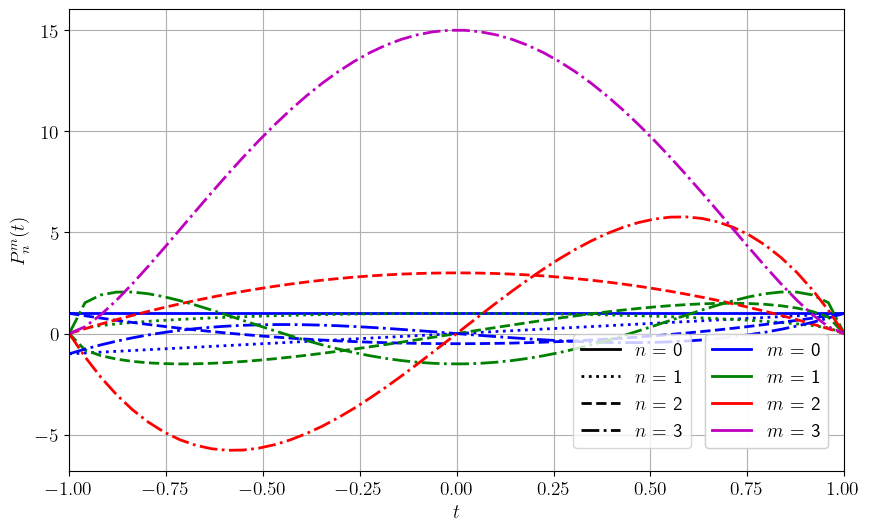

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
linestyles = ['solid', 'dotted', 'dashed', 'dashdot']
colors = ['b', 'g', 'r', 'm', 'm', 'y', 'k', 'w']

x = np.linspace(-1, 1)

n_max = 3
for n in range(n_max + 1):
    lnsty = linestyles[n]
    for m in range(n + 1):
        colors
        y = [(-1)**m * special.lpmv(m, n, xi) for xi in x]
        ax.plot(x, y, linestyle=linestyles[n],
                color=colors[m], label = '', linewidth=2)

ax.set_xlabel('$t$', fontsize=14)
ax.set_ylabel('$P_{n}^m (t)$', fontsize=14)
ax.set_xlim(-1, 1)

lines = ax.get_lines()
lines = [copy.copy(ln) for ln in lines]
[ln.set_color('k') for ln in lines]

legend1 = ax.legend([lines[i] for i in [0, 1, 3, 6]],
                    ['$n$ = ' + str(ni) for ni in np.arange(n_max+1)],
                    loc=(0.65, 0.05), fontsize=14)

lines = ax.get_lines()
lines = [copy.copy(ln) for ln in lines]
[ln.set_linestyle('-') for ln in lines]

legend2 = ax.legend([lines[i] for i in [0, 2, 5, 9]],
                    ['$m$ = ' + str(ni) for ni in np.arange(n_max+1)],
                    loc=(0.82, 0.05), fontsize=14)

ax.add_artist(legend1)
ax.add_artist(legend2)
ax.grid()

Из графиков и анализа можно установить некоторые свойства присоединённых функций Лежандра.

1. Присоединённые функции Лежандра могут быть как чётными, так и нечётными в зависимости от степени и порядка
$$
P_n^m \left( -t \right) = \left( -1 \right)^{n + m} P_n^m \left( t \right).
$$
1. Функция степени $n$ и порядка $m$ имеет ровно $n - m$ нулей.
1. При $m \neq 0$ на границе области определения при $t = \pm 1$ значение функции обращается в нуль, потому что мы имеем ровно $n - m + 1$ инетрвал с постоянным знаком.

### Свойство ортогональности и норма

Присоединённые функции Лежандра являются ортогональными на интервале $\left[-1, 1\right]$, что можно выразить двумя условиями

$$
\begin{align*}
\int_{-1}^{1} P_k ^{m} P_l ^{m} dt &= 0, \quad k\neq l, \\
\int_{-1}^{1} P_n ^{k} P_n ^{l} dt &= 0, \quad k\neq l.
\end{align*}
$$

То есть присоединённые функции Лежандра попарно ортогональны либо при одинаковых степенях, но разных порядках, либо при одинаковых порядках, но разных степенях.

In [17]:
m, k, l = 3, 5, 7
integrate(assoc_legendre(k, m, t) * assoc_legendre(l, m, t), (t, -1, 1))

In [18]:
n, k, l = 3, 1, 2
integrate(assoc_legendre(n, k, t) * assoc_legendre(n, l, t), (t, -1, 1))

Норма присоединённых функций Лежандра будет равна

$$
\| P_n^m \| = \sqrt{\int_{-1}^{1} \left[ P_{n}^{m} \right]^2 dt} = 
\sqrt{\dfrac{2}{2n + 1} \dfrac{\left( n + k \right)!}{\left( n - k \right)!}}.
$$

Следовательно, нормированные полиномы Лежандра связаны с ненормированными следующим соотношением

$$
\overline{P_n^m} = \sqrt{\dfrac{2n + 1}{2} \dfrac{\left( n - k \right)!}{\left( n + k \right)!}} P_n^m.
$$

Проверить, нормирована ли присоединённая функция можно так

$$
\|\overline{P_n^m}\|^2 = \int_{-1}^{1} \left[ \overline{P_n^m} \right]^2 dt = 1.
$$

In [19]:
n, m = 3, 2
integrate((sqrt(0.5*(2*n + 1) * factorial(n - m) / factorial(n + m)) 
          * assoc_legendre(3, 2, t))**2, (t, -1, 1))

Почему удобно пользоваться нормированными полиномами и присоединёнымм функциями Лежандра? Сравниваем для $n = m = 50$ при $t = 0.5$:

In [20]:
m = n =50
t = 0.5
assoc_legendre(m, n, t)

In [21]:
sqrt(0.5*(2*n + 1) * factorial(n - m) / factorial(n + m)) * assoc_legendre(m, n, t)

Как видно, при увеличении степени и порядка ненормированные присоединённые функции стремительно возрастают, что во-первых, очень скоро приведёт нас к границе вычислительных способностей современных компьютеров, а во-вторых, просто неудобно. Нормированные функции этих недостатков лишены.